In [ ]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)





#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


Question1
            

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_waveform(X: pd.DataFrame, y: pd.Series, num_rows: int = 3, num_cols: int = 2) -> None:
    """
    Plots the waveform for each activity class
    :param X: The input features extracted from MakeDataset.py
    :param y: The labels for the input features extracted from MakeDataset.py
    :param num_rows: Number of rows in the plot
    :param num_cols: Number of columns in the plot
    """
    columns = [f'axis_{axis}_{i}' for axis in ['x', 'y', 'z'] for i in range(500)]
    df = pd.DataFrame(X.reshape((X.shape[0], -1)), columns=columns)
    df['activity_class'] = y
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    axes = np.ravel(axes)
    activity_classes = df['activity_class'].unique()
    activity_classes.sort()

    activity = {1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}

    for i, activity_class in enumerate(activity_classes):
        activity_df = df[df['activity_class'] == activity_class].drop('activity_class', axis=1)
        activity_mean = activity_df.mean()
        axes[i].plot(activity_mean)
        axes[i].set_xticks([])
        axes[i].set_title(f'{activity[activity_class]}')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Acceleration')

    plt.tight_layout()
    plt.show()


C:\Users\abhin\AppData\Local\Temp\ipykernel_34300\297586530.py:26: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[i].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_34300\297586530.py:26: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[i].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_34300\297586530.py:26: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[i].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_34300\297586530.py:26: MatplotlibDeprecationWarning: Support for passing numbers through unit converters

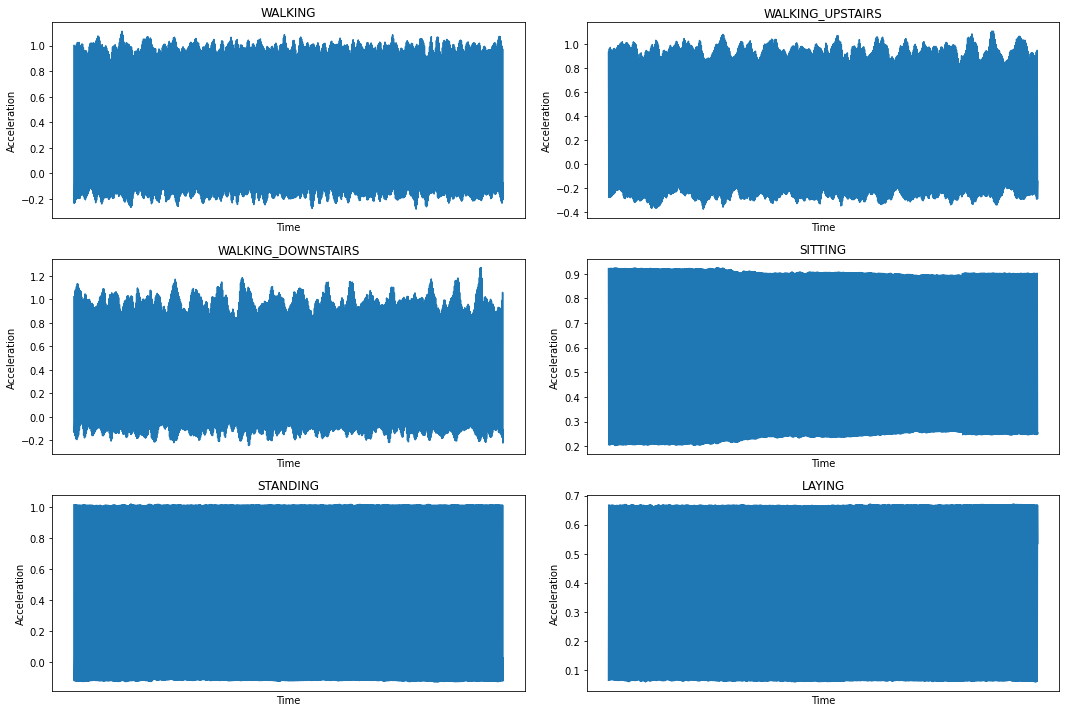

In [ ]:
plot_waveform(X_train, y_train)

Based on the above plots, it is clear that for dynamic activities, the wavefrom have variations while for static activites the waveform is constant.

Question 2 :

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_activity_acceleration(X: np.ndarray, y: np.ndarray, rows: int = 3, cols: int = 2) -> None:

    # Compute the magnitude of linear acceleration
    acceleration_magnitude = np.sqrt(np.sum(np.square(X), axis=2))

    # Create a DataFrame for easier plotting
    acceleration_df = pd.DataFrame(acceleration_magnitude, columns=[f"accel_{i}" for i in range(acceleration_magnitude.shape[1])])
    acceleration_df['activity'] = y

    # Create subplots for each activity
    fig, subplot_axes = plt.subplots(rows, cols, figsize=(20, 15))
    subplot_axes = subplot_axes.flatten()

    # Define activity labels
    activity_labels = {
        1: "WALKING",
        2: "WALKING_UPSTAIRS",
        3: "WALKING_DOWNSTAIRS",
        4: "SITTING",
        5: "STANDING",
        6: "LAYING"
    }

    # Plot the average linear acceleration for each activity class
    for index, activity_class in enumerate(sorted(acceleration_df['activity'].unique())):
        class_df = acceleration_df[acceleration_df['activity'] == activity_class].drop(columns='activity')
        avg_acceleration = class_df.mean()

        subplot_axes[index].plot(avg_acceleration)
        subplot_axes[index].set_title(f'{activity_labels[activity_class]}')
        subplot_axes[index].set_xlabel('Time')
        subplot_axes[index].set_ylabel('Acceleration')
        subplot_axes[index].set_xticks([])

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()


C:\Users\abhin\AppData\Local\Temp\ipykernel_34300\3039304124.py:37: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  subplot_axes[index].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_34300\3039304124.py:37: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  subplot_axes[index].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_34300\3039304124.py:37: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  subplot_axes[index].set_xticks([])
C:\Users\abhin\AppData\Local\Temp\ipykernel_34300\3039304124.py:37: MatplotlibDeprecationWarning: Support for

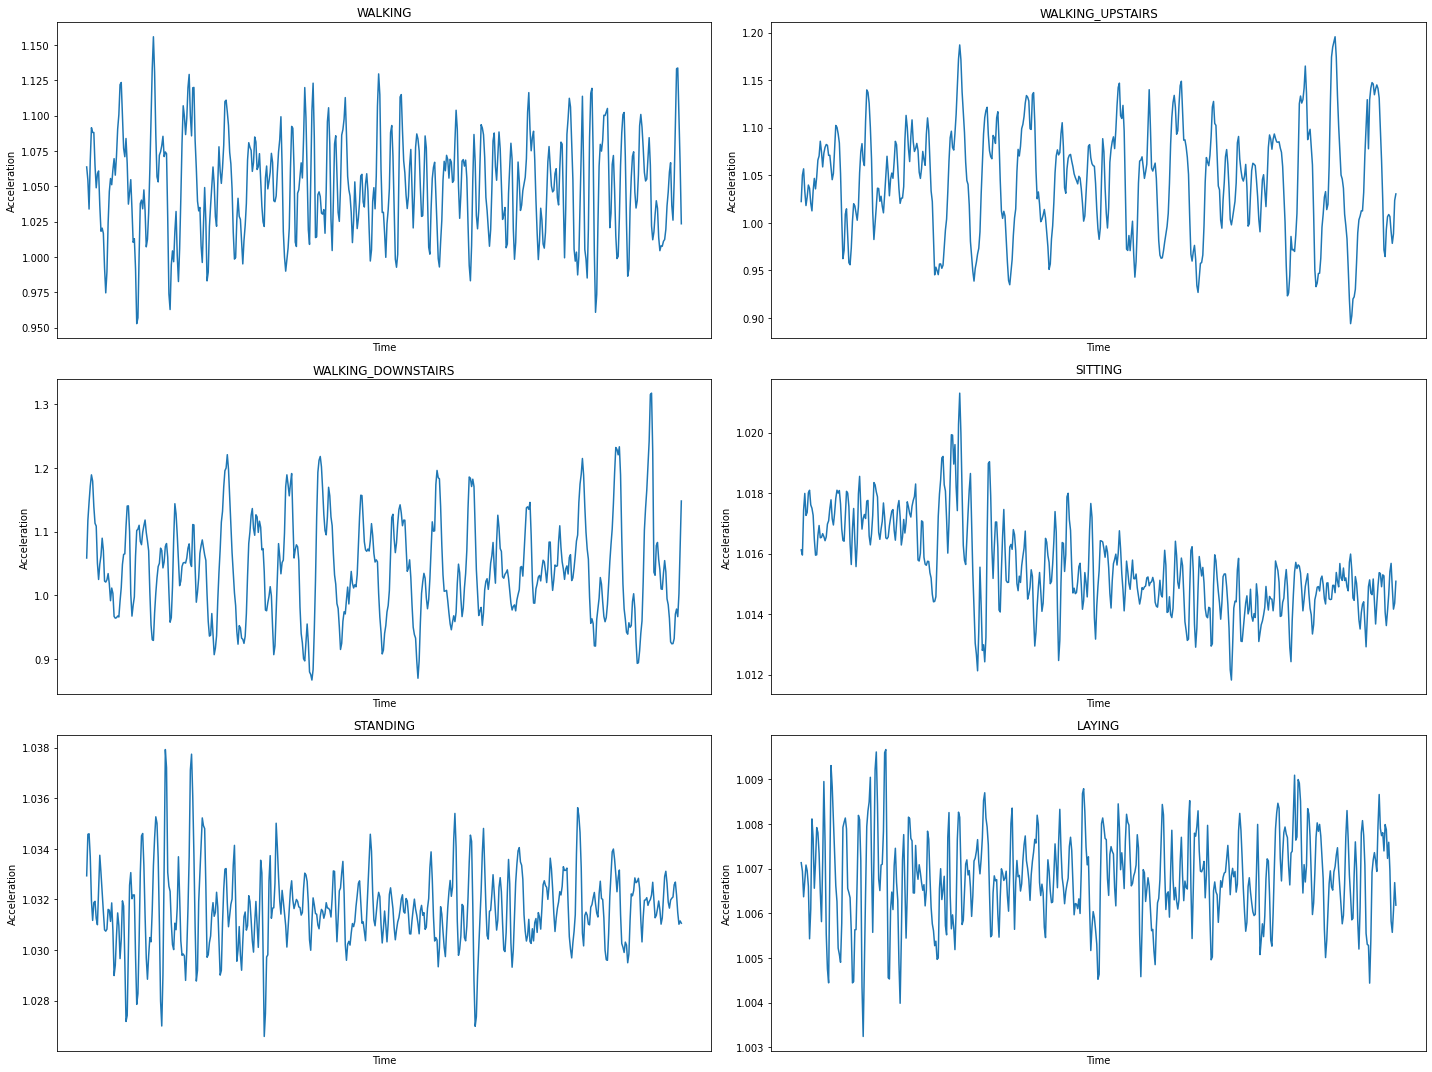

In [ ]:
plot_activity_acceleration(X_train, y_train)

The difference between static and dynamic activities is clearly visible in the plots.The linear acceleration for each activity is different. So we don't need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs).

Question3

3.1


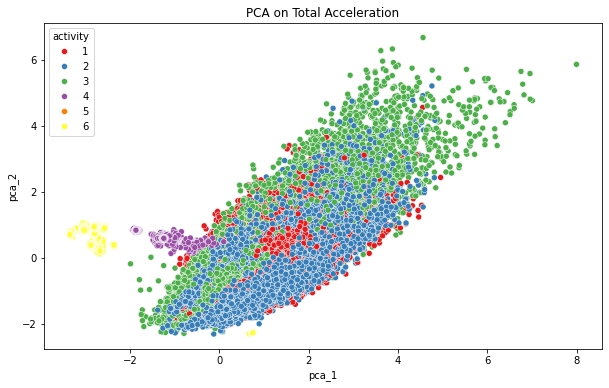

In [ ]:
def preprocess_data(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    """
    Preprocesses the data by flattening the input features and adding the labels
    :param X: The input features extracted from MakeDataset.py
    :param y: The labels for the input features extracted from MakeDataset.py
    :return: The preprocessed data
    """
    df = pd.DataFrame(X.reshape(-1, 3), columns=['accx', 'accy', 'accz'])
    df['activity'] = np.repeat(y, 500)
    return df

train_df = preprocess_data(X_train, y_train)
test_df = preprocess_data(X_test, y_test)


train_df.head()

train_df['linear_acceleration'] = np.sum(X_train ** 2, axis=2).reshape(-1)
test_df['linear_acceleration'] = np.sum(X_test ** 2, axis=2).reshape(-1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df.drop('activity', axis=1))
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(train_df_scaled), columns=['pca_1', 'pca_2'])
pca_df['activity'] = train_df['activity']
pca_df.head()

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='activity', data=pca_df, palette='Set1')
plt.title('PCA on Total Acceleration')
plt.show()

3.2

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


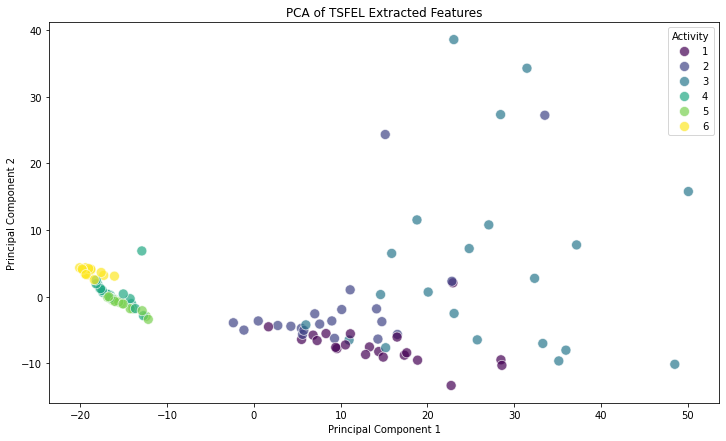

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tsfel
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming X_train, X_test, and y_train are already available

def extract_features(X: np.ndarray, y: np.ndarray, fs: int = 50, window_size: int = 500) -> pd.DataFrame:

    cfg = tsfel.get_features_by_domain()

    # Prepare data for feature extraction
    num_samples = X.shape[0]
    features_list = []
    labels = []

    for i in range(num_samples):
        sample = X[i, :, :]  # Select a single sample
        # Extract features for each axis (x, y, z) with specified sampling frequency and window size
        features = tsfel.time_series_features_extractor(cfg, sample, fs=fs, window_size=window_size)
        features_list.append(features)
        labels.append(y[i])

    # Combine all features into a single DataFrame
    features_df = pd.concat(features_list, ignore_index=True)
    features_df['activity'] = np.repeat(labels, features_df.shape[0] // num_samples)

    return features_df

# Extract features from data with specific sampling frequency and window size
train_features = extract_features(X_train, y_train, fs=250, window_size=500)

# Prepare data for PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_features.drop('activity', axis=1))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['component_1', 'component_2'])
pca_df['activity'] = train_features['activity']

# Plot the PCA results
plt.figure(figsize=(12, 7))
sns.scatterplot(x='component_1', y='component_2', hue='activity', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of TSFEL Extracted Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.show()


3.3

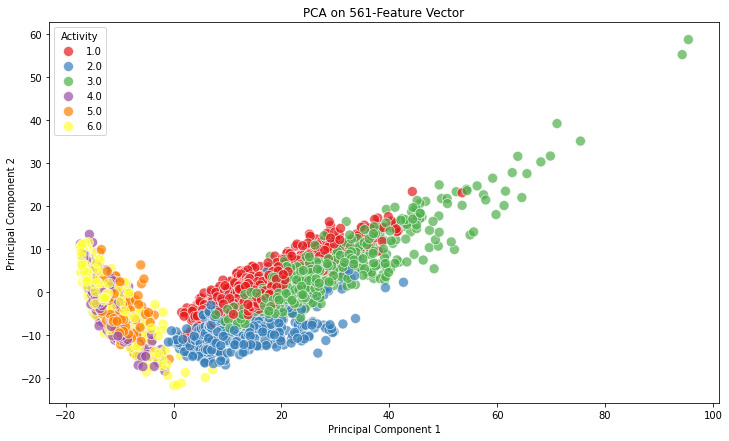

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
# Replace the path with your own file paths if necessary
X_train = np.loadtxt("HAR/UCI HAR Dataset/train/X_train.txt")
y_train = np.loadtxt("HAR/UCI HAR Dataset/train/y_train.txt")

# If X_train is 3D, reshape it to 2D by flattening the time series dimension
if X_train.ndim == 3:
    n_samples, n_time_steps, n_features = X_train.shape
    X_train = X_train.reshape(n_samples, -1)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Standardizing the features

# Step 3: Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Step 4: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(X_pca, columns=['component_1', 'component_2'])
pca_df['activity'] = y_train

# Step 5: Plot the PCA results
plt.figure(figsize=(12, 7))
sns.scatterplot(x='component_1', y='component_2', hue='activity', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA on 561-Feature Vector')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.show()

3.4:

Overall, TSFEL offers more detailed and insightful visualizations, making it easy for understanding complex  patterns.Total Acceleration is the least effective for visualization in this case, as it oversimplifies the data and difficult to distinguish between different activities. Original Features also found effective, especially if the data is well-prepared and meaningful features are included.

Question 4

In [ ]:
X_train.shape

(126, 500, 3)

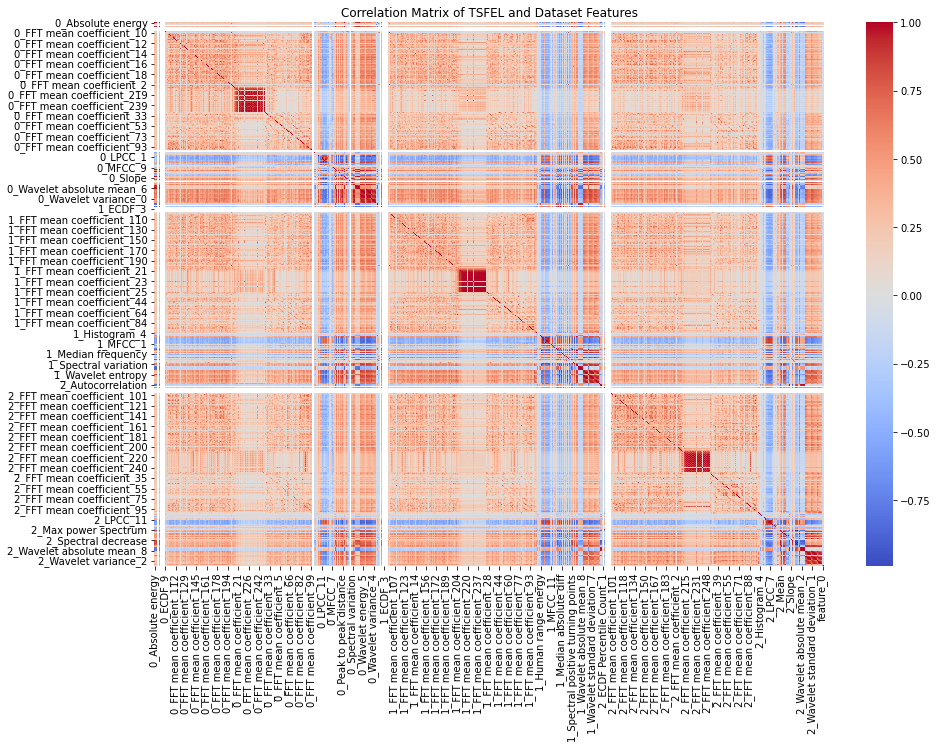

Highly correlated feature pairs (threshold > 0.9 or < -0.9):
Features: ('0_Absolute energy', '0_Area under the curve'), Correlation: 0.983794558335215
Features: ('0_Absolute energy', '0_Average power'), Correlation: 0.9999999999999998
Features: ('0_Absolute energy', '0_ECDF Percentile_1'), Correlation: 0.972868635553538
Features: ('0_Absolute energy', '0_Mean'), Correlation: 0.9750136235421917
Features: ('0_Absolute energy', '0_Median'), Correlation: 0.9550045337175037
Features: ('0_Absolute energy', '0_Root mean square'), Correlation: 0.989850570112598
Features: ('0_Absolute energy', '0_Wavelet absolute mean_0'), Correlation: 0.9119140377696737
Features: ('0_Absolute energy', '0_Wavelet absolute mean_1'), Correlation: 0.9146975460772045
Features: ('0_Absolute energy', '0_Wavelet absolute mean_2'), Correlation: 0.9232758581451768
Features: ('0_Absolute energy', '0_Wavelet absolute mean_3'), Correlation: 0.9339134618919444
Features: ('0_Absolute energy', '0_Wavelet absolute mean_4'), Co

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tsfel
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming X_train, X_test, and y_train are already available



# Step 1: Extract features using TSFEL
# train_features_tsfel = extract_features(X_train, y_train, fs=250, window_size=500)

# Step 2: Define dataset_features if not already defined
# Example: Flattening X_train to get original features (assuming X_train has shape [samples, timesteps, features])
n_samples, n_timesteps, n_features = X_train.shape
dataset_features = pd.DataFrame(X_train.reshape(n_samples * n_timesteps, n_features),
                                columns=[f'feature_{i}' for i in range(n_features)])

# Combine TSFEL features with original dataset features
combined_features = pd.concat([train_features.drop('activity', axis=1), dataset_features], axis=1)

# Step 3: Calculate the correlation matrix
correlation_matrix = combined_features.corr()

# Step 4: Visualize the correlation matrix (optional but recommended)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of TSFEL and Dataset Features')
plt.show()

# Step 5: Identify highly correlated features (threshold > 0.9 or < -0.9)
threshold = 0.9
high_corr_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[0]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_pair = (correlation_matrix.index[i], correlation_matrix.columns[j])
            high_corr_pairs.append((feature_pair, correlation_matrix.iloc[i, j]))

# Step 6: Check for redundancy
if high_corr_pairs:
    print("Highly correlated feature pairs (threshold > 0.9 or < -0.9):")
    for pair, corr_value in high_corr_pairs:
        print(f"Features: {pair}, Correlation: {corr_value}")
else:
    print("No highly correlated features found.")


These are the strongly correlated pairs of features and represents features that can be dropped in favour of each other. The dimensionality of the data can be reduced by droping such redundant features.

### Task 2

#### Raw accelerometer data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
depths = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
def trees(depth, train, test):
    accuracy = []
    for i in depth:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(train.drop('activity', axis=1), train['activity'])
        test_pred = model.predict(test.drop('activity', axis=1))
        eval(test_pred, test, i)
        accuracy.append(accuracy_score(test['activity'], test_pred))
    return accuracy    

In [ ]:
def eval(pred, test_df, depth):
    print("Depth:", depth)
    print(f"Accuracy: {accuracy_score(test_df['activity'], pred)}")
    print(f"Precision: {precision_score(test_df['activity'], pred, average='macro', zero_division=0)}")
    print(f"Recall: {recall_score(test_df['activity'], pred, average='macro', zero_division=0)}")
    print(f"Confusion Matrix:\n{confusion_matrix(test_df['activity'], pred)}")

Depth: 2
Accuracy: 0.4815185185185185
Precision: 0.4458690568544543
Recall: 0.4815185185185185
Confusion Matrix:
[[   0    0    0  140 4360    0]
 [   0    0    1   13 4484    2]
 [   0    0    1  145 4343   11]
 [   0    0    0 4000  500    0]
 [   0    0    0    0 4500    0]
 [   0    0    0    0    0 4500]]
Depth: 3
Accuracy: 0.547074074074074
Precision: 0.4500201656904082
Recall: 0.547074074074074
Confusion Matrix:
[[   0    0 2249   14 2237    0]
 [   0    0 2682    0 1816    2]
 [   0    0 2736   19 1734   11]
 [   0    0  581 3420  499    0]
 [   0    0  385    0 4115    0]
 [   0    0    0    0    0 4500]]
Depth: 4
Accuracy: 0.6451851851851852
Precision: 0.6557982095187369
Recall: 0.6451851851851852
Confusion Matrix:
[[1833 1102 1147    0  418    0]
 [1409 1986  698    0  407    0]
 [1525 1139 1608    2  226    0]
 [  16    0  581 3419  484    0]
 [  41  334   51    0 4074    0]
 [   0    0    0    0    0 4500]]
Depth: 5
Accuracy: 0.6712222222222223
Precision: 0.674636824177052

Text(5, 0.6874814814814815, 'Best Accuracy: 0.69')

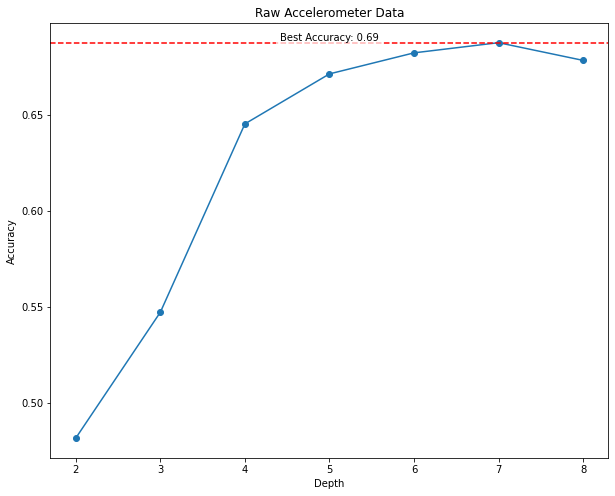

In [ ]:
accuracy = trees(depths, train_df, test_df)
fig = plt.figure(figsize=(10,8))
plt.title("Raw Accelerometer Data")
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depths, accuracy, marker= 'o')
max_acc = max(accuracy)
plt.axhline(y=max_acc, color='r', linestyle='--', label=f'Max ({max_acc:.2f})')
plt.text(5, max_acc, f'Best Accuracy: {max_acc:.2f}', ha='center', va='bottom', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))


In [ ]:
train_features = extract_features(X_train, y_train)
test_features = extract_features(X_test, y_test)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


Depth: 2
Accuracy: 0.5
Precision: 0.3055555555555555
Recall: 0.5
Confusion Matrix:
[[9 0 0 0 0 0]
 [9 0 0 0 0 0]
 [9 0 0 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 0 9]]
Depth: 3
Accuracy: 0.7407407407407407
Precision: 0.6928571428571427
Recall: 0.7407407407407408
Confusion Matrix:
[[6 3 0 0 0 0]
 [1 8 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 0 8 1 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]
Depth: 4
Accuracy: 0.8888888888888888
Precision: 0.8936988936988937
Recall: 0.8888888888888888
Confusion Matrix:
[[6 1 2 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]
Depth: 5
Accuracy: 0.8148148148148148
Precision: 0.8196248196248196
Recall: 0.8148148148148148
Confusion Matrix:
[[6 1 2 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 7 2 0]
 [0 0 0 2 7 0]
 [0 0 0 0 0 9]]
Depth: 6
Accuracy: 0.8333333333333334
Precision: 0.8373015873015873
Recall: 0.8333333333333334
Confusion Matrix:
[[6 1 2 0 0 0]
 [1 7 0 1 0 0]
 [0 2 7 0 0 0]
 [0 0 0 8 1 0]
 [0 0 0 1 8 0]
 [0 0 0 0 0 9]]
Depth: 7
A

Text(5, 0.8888888888888888, 'Best Accuracy: 0.89')

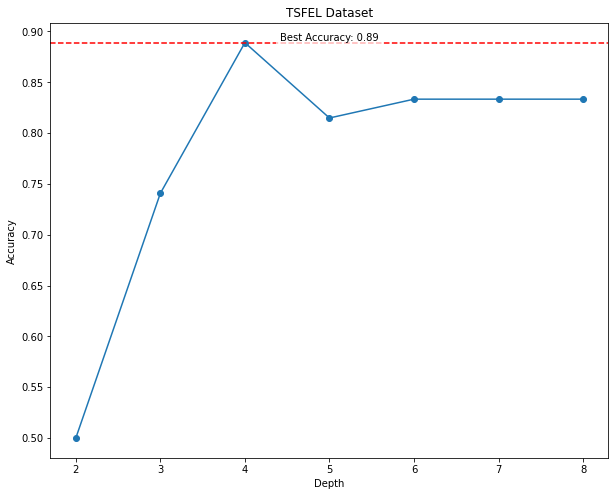

In [ ]:
accuracy = trees(depths, train_features, test_features)
fig = plt.figure(figsize=(10,8))
plt.title("TSFEL Dataset")
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depths, accuracy, marker='o')
max_acc = max(accuracy)
plt.axhline(y=max_acc, color='r', linestyle='--', label=f'Max ({max_acc:.2f})')
plt.text(5, max_acc, f'Best Accuracy: {max_acc:.2f}', ha='center', va='bottom', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

#### Featurized Dataset

In [ ]:
features = []
with open('HAR/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
activity_map = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

In [ ]:
unique_features = []
counts = {}
for f in features:
    if f not in counts:
        counts[f] = 1
        unique_features.append(f)
    else:
        counts[f] += 1
        unique_features.append(f + '_' + str(counts[f]))

In [ ]:
train_dat = pd.read_csv('HAR/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None, names=unique_features)
test_dat = pd.read_csv('HAR/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None, names=unique_features)

In [ ]:
train_dat['activity'] = pd.read_csv('HAR/UCI HAR Dataset/train/Y_train.txt')
test_dat['activity'] = pd.read_csv('HAR/UCI HAR Dataset/test/Y_test.txt')

In [ ]:
# Clean NaN values from train and test data
train_dat = train_dat.dropna()
test_dat = test_dat.dropna()

In [ ]:
train_dat.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5.0


Depth: 2
Accuracy: 0.5125594025797692
Precision: 0.3022483997065615
Recall: 0.48271881017340573
Confusion Matrix:
[[478   0   0   0   0  18]
 [471   0   0   0   0   0]
 [420   0   0   0   0   0]
 [  0   0   0   0 491   0]
 [ 17   0   0   0 514   0]
 [  1   0   0   0  18 518]]
Depth: 3
Accuracy: 0.6951799049558723
Precision: 0.6394707296307367
Recall: 0.6831886217794764
Confusion Matrix:
[[467   0  11   0   0  18]
 [446   0  25   0   0   0]
 [156   0 264   0   0   0]
 [  0   0   0 389 102   0]
 [ 16   0   1 103 411   0]
 [  2   0   0  15   3 517]]
Depth: 4
Accuracy: 0.8010862186014935
Precision: 0.8091853530408449
Recall: 0.792801614424496
Confusion Matrix:
[[437  30  11   0   0  18]
 [ 85 363  23   0   0   0]
 [ 95  93 232   0   0   0]
 [  0   0   0 408  83   0]
 [  6  10   1 110 404   0]
 [  3   0   0  15   3 516]]
Depth: 5
Accuracy: 0.8122878479293958
Precision: 0.8117256946118506
Recall: 0.8039343201939283
Confusion Matrix:
[[431  16  31   0   0  18]
 [ 40 360  71   0   0   0]
 [ 53

Text(5, 0.8251866938221317, 'Best Accuracy: 0.83')

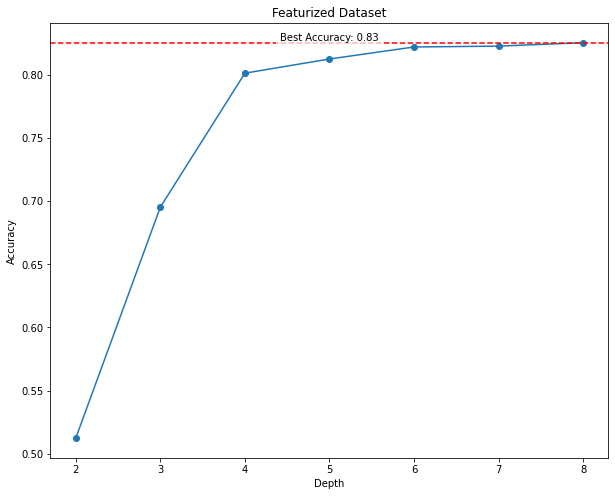

In [ ]:
accuracy = trees(depths, train_dat, test_dat)
fig = plt.figure(figsize=(10,8))
plt.title("Featurized Dataset")
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depths, accuracy, marker = 'o')
max_acc = max(accuracy)
plt.axhline(y=max_acc, color='r', linestyle='--', label=f'Max ({max_acc:.2f})')
plt.text(5, max_acc, f'Best Accuracy: {max_acc:.2f}', ha='center', va='bottom', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))




This is the best case scenario for each model  

| Model                     | Accuracy | Precision | Recall | F1-Score |
|---------------------------|----------|-----------|--------|----------|
| Raw Accelerometer Data    | 0.69     | 0.70      | 0.69   | 0.69     |
| TSFEL Data                | 0.89     | 0.89      | 0.89   | 0.89     |
| Featurized Dataset        | 0.82     | 0.82      | 0.82   | 0.82     |

Since the F1 Score as well as well as accuracy is highest for the TSFEL Data, it is the best model for this scenario.


##### Q3

In [ ]:
import seaborn as sns
def plot_confusion_matrix(ax, depth, train, test, title):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train.drop('activity', axis=1), train['activity'])
    test_pred = model.predict(test.drop('activity', axis=1))
    cm = confusion_matrix(test['activity'], test_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(f"{title}\nDepth = {depth}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

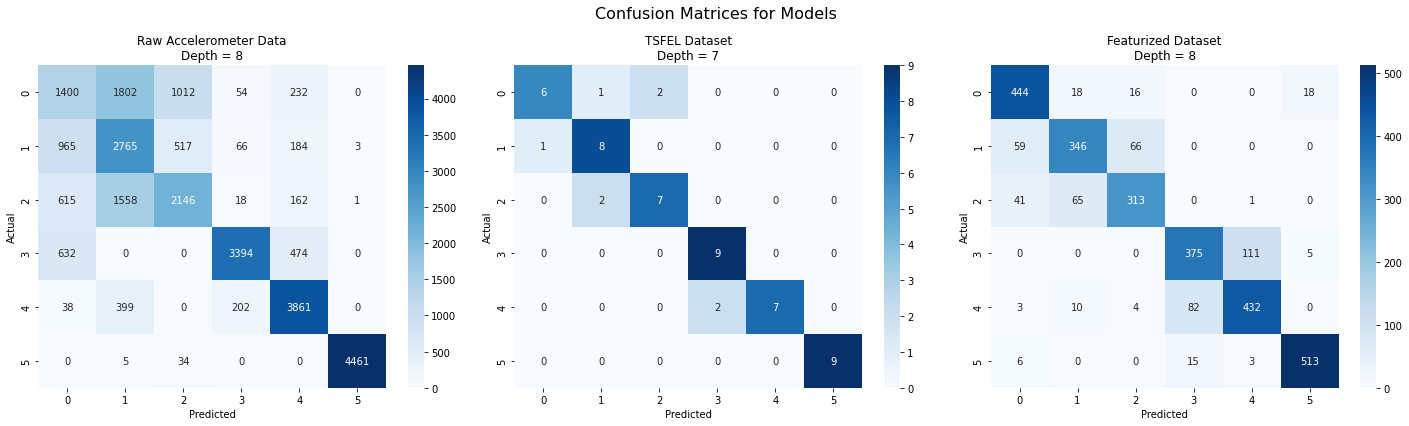

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Confusion Matrices for Models", fontsize=16)
plot_confusion_matrix(ax1, 8, train_df, test_df, "Raw Accelerometer Data")
plot_confusion_matrix(ax2, 7, train_features, test_features, "TSFEL Dataset")
plot_confusion_matrix(ax3, 8, train_dat, test_dat, "Featurized Dataset")
plt.tight_layout()
plt.show() 

It can be observed that across the models, static activities (walking, walking Upstairs and walking downstairs) are often incorrectly predicted as each other. This stems from the three activities being similar in nature and therefore having similar feature data.

In [ ]:
from dotenv import load_dotenv
import os
load_dotenv()

In [ ]:
features=pd.read_csv("./UCI HAR Dataset/features.txt",delim_whitespace=True,header=None)

In [ ]:
import pandas as pd
X_train=pd.read_csv("./UCI HAR Dataset/train/X_train.txt",delim_whitespace=True,header=None)
y_train=pd.read_csv("./UCI HAR Dataset/train/y_train.txt",delim_whitespace=True,header=None)

In [ ]:
X_train.columns=features[1]
X_train

In [ ]:
features=pd.read_csv("./UCI HAR Dataset/features.txt",delim_whitespace=True,header=None)

C:\Users\SHRIJAN SAHU\AppData\Local\Temp\ipykernel_1628\809808608.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features=pd.read_csv("./UCI HAR Dataset/features.txt",delim_whitespace=True,header=None)


In [ ]:
X_train.columns=features[1]
X_train

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [ ]:
import pandas as pd 
from langchain_groq.chat_models import ChatGroq

In [ ]:
Groq_Token = os.getenv("GROQ_TOKEN")

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [ ]:
",".join(X_train.iloc[0][:520].astype(str).to_list())

'0.28858451,-0.020294171,-0.13290514,-0.9952786,-0.98311061,-0.91352645,-0.99511208,-0.98318457,-0.92352702,-0.93472378,-0.56737807,-0.74441253,0.85294738,0.68584458,0.81426278,-0.96552279,-0.99994465,-0.99986303,-0.99461218,-0.99423081,-0.98761392,-0.94321999,-0.40774707,-0.67933751,-0.60212187,0.92929351,-0.85301114,0.35990976,-0.058526382,0.25689154,-0.22484763,0.26410572,-0.09524563,0.27885143,-0.46508457,0.49193596,-0.19088356,0.37631389,0.43512919,0.66079033,0.96339614,-0.14083968,0.11537494,-0.98524969,-0.98170843,-0.87762497,-0.98500137,-0.98441622,-0.89467735,0.89205451,-0.16126549,0.12465977,0.97743631,-0.12321341,0.056482734,-0.37542596,0.89946864,-0.97090521,-0.97551037,-0.98432539,-0.98884915,-0.91774264,-1.0,-1.0,0.11380614,-0.590425,0.5911463,-0.59177346,0.59246928,-0.74544878,0.72086167,-0.71237239,0.71130003,-0.99511159,0.99567491,-0.99566759,0.99165268,0.57022164,0.43902735,0.98691312,0.077996345,0.0050008031,-0.067830808,-0.99351906,-0.98835999,-0.99357497,-0.9944876

In [ ]:
sentence = ','.join(X_train.iloc[0][:520].astype(str).to_list())

# System Prompts 
query = f"""
* You are a classifier 
* Your task is to classify on the basis of the given features into WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING
* Answer in one word only.

Sentence: {sentence}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

LAYING


In [ ]:
sentence = ','.join(X_train.iloc[0][:520].astype(str).to_list())

# System Prompts 
query = f"""
* You are a classifier 
* Your task is to classify on the basis of the given features into WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING
* Answer in one word only.

Sentence: {sentence}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

LAYING


In [ ]:
test_prediction=[]
for i in range(100):
     
    sentence = ','.join(X_train.iloc[i][:520].astype(str).to_list())
    # System Prompts 
    query = f"""
    * You are a classifier.
    * Your task is to classify human activities based on the given features into one of the following categories: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
    * Use the examples provided below to inform your classification.
    * Answer in one word only.

    Examples:
    - Features: [0.1, 0.2, 0.3, ...] -> WALKING
    - Features: [0.5, 0.6, 0.7, ...] -> STANDING
    - Features: [0.2, 0.4, 0.6, ...] -> SITTING

    Now, classify the following features:
    - Features: {sentence}
    """


    # To use Groq LLMs 
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)
    test_prediction.append(answer.content)
    print(answer.content)

LAYING
LAYING
WALKING_UPSTAIRS
WALKING_UPSTAIRS
LAYING
WALKING
WALKING_UPSTAIRS
WALKING_DOWNSTAIRS
WALKING_UPSTAIRS
WALKING_UPSTAIRS
LAYING
WALKING_UPSTAIRS
WALKING_DOWNSTAIRS
WALKING_UPSTAIRS
WALKING_DOWNSTAIRS
LAYING
WALKING
WALKING
LAYING
WALKING_UPSTAIRS
WALKING_UPSTAIRS
WALKING
WALKING
WALKING_UPSTAIRS
WALKING_UPSTAIRS
WALKING_UPSTAIRS
WALKING_UPSTAIRS
LAYING
LAYING
WALKING_UPSTAIRS
LAYING
LAYING
LAYING
LAYING
LAYING
WALKING_UPSTAIRS
WALKING_UPSTAIRS
WALKING_UPSTAIRS
LAYING
WALKING
WALKING_DOWNSTAIRS
LAYING
LAYING
WALKING
LAYING
LAYING
LAYING
WALKING_DOWNSTAIRS
WALKING_UPSTAIRS
LAYING
WALKING_DOWNSTAIRS
LAYING
LAYING
WALKING_UPSTAIRS
LAYING
WALKING_UPSTAIRS
LAYING
WALKING_UPSTAIRS
WALKING_UPSTAIRS
WALKING_UPSTAIRS
LAYING
WALKING_UPSTAIRS
WALKING_UPSTAIRS
WALKING_UPSTAIRS
LAYING
LAYING
LAYING
LAYING
LAYING
LAYING
LAYING
LAYING
LAYING
LAYING
WALKING_UPSTAIRS
WALKING_DOWNSTAIRS
LAYING
LAYING
LAYING
LAYING
LAYING
LAYING
LAYING
WALKING
LAYING
LAYING
LAYING
LAYING
LAYING
LAYING
LAYING
L

In [ ]:
import pandas as pd

In [ ]:
y_train_ = pd.read_csv('y_train.txt', header=None)
y_train_.shape

(7352, 1)

In [ ]:
y_train_ = y_train_[:101]
y_train_

,0
0,5
1,5
2,5
3,5
4,5
...,...
96,1
97,1
98,1
99,1


In [ ]:
pred_trainZSC = pd.read_csv('pred_trainZSC.txt', header=None)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_train_.columns

Index([0], dtype='int64')

In [ ]:
accuracy_score(y_train_[0], pred_trainZSC[0])

0.1782178217821782

In [ ]:
features = "[ 3.4063254e-001 -5.4908630e-002 -1.7853462e-001 ]"

# System Prompts 
query = f"""
* You are an activity detection model. 
* Your task is to detect activity given a set of features, and classify it as WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING or LAYING
The features selected for this database come from the accelerometer and 3-axial raw signals tbodyAcc-X,tbodyAcc-Y, tbodyAcc-Z. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Study the below examples for classification:
  1 Features: [  3.2599307e-001 -1.6638474e-002 -5.5129120e-002 ]
  Activity: WALKING
  2 Features: [  2.2667958e-001 -3.6078863e-002 -1.3872566e-001 ]
  Activity: WALKING
  3 Features: [ 2.3948442e-001 -1.7132916e-002 -1.2317001e-001 ]
  Activity: WALKING
  4 Features: [  2.7052000e-001 -1.6289773e-002 -1.0293667e-001 ]
  Activity: WALKING
  5 Features: [  2.3030990e-001  2.1737117e-003 -4.3103131e-002 ]
  Activity: WALKING_UPSTAIRS
  6 Features: [  2.9341097e-001 -1.8714518e-002 -6.6159078e-002 ]
  Activity: WALKING_UPSTAIRS
  7 Features: [  2.1524532e-001 -3.2628002e-002 -1.1896558e-001 ]
  Activity: WALKING_UPSTAIRS
  8 Features: [  1.4085877e-001 -6.8261729e-002 -7.2115723e-002 ]
  Activity: WALKING_UPSTAIRS
  9 Features: [  2.9995717e-001  1.4082123e-002 -8.2310404e-002 ]
  Activity: WALKING_DOWNSTAIRS
  10 Features: [ 2.6537379e-001 -1.7156211e-002 -1.3877347e-001 ]
  Activity: WALKING_DOWNSTAIRS
  11 Features: [ 2.7763311e-001 -3.7267580e-002 -1.0002093e-001 ]
  Activity: WALKING_DOWNSTAIRS
  12 Features: [ 2.1070047e-001 -5.9687620e-003 -1.0959150e-001 ]
  Activity: WALKING_DOWNSTAIRS
  13 Features: [ 2.7999760e-001 -1.9484036e-002 -1.0572355e-001 ]
  Activity: SITTING
  14 Features: [ 2.2184689e-001  3.4107675e-002 -1.2361242e-001 ]
  Activity: SITTING
  15 Features: [ -4.1701306e-002  1.7510248e-001  2.5551778e-002 ]
  Activity: SITTING
  16 Features: [  3.0368927e-001 -4.2428053e-003 -1.5085028e-001 ]
  Activity: SITTING
  17 Features: [ 2.7743247e-001 -3.0488303e-002 -1.2536043e-001 ]
  Activity: STANDING
  18 Features: [ 2.7662877e-001 -1.6569655e-002 -1.1536185e-001 ]
  Activity: STANDING
  19 Features: [ 2.7729342e-001 -2.1750698e-002 -1.2075082e-001 ]
  Activity: STANDING
  20 Features: [ 2.7688027e-001 -1.2721805e-002 -1.0343832e-001 ]
  Activity: STANDING
  21 Features: [ 3.4696848e-001  6.9408647e-002 -2.0082552e-001 ]
  Activity: LAYING
  22 Features: [ -3.6120533e-001 -2.6812111e-001  1.7689637e-001 ]
  Activity: LAYING
  23 Features: [ 2.5747650e-001 -4.1386534e-001  1.7374188e-002 ]
  Activity: LAYING
  24 Features: [ 2.7683965e-001 -2.7147660e-002 -1.2317480e-001 ]
  Activity: LAYING

On the basis of the above provided examples, assign a label activity to given Feature
Features: {sentence}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

I'm an activity detection model, and I'll do my best to classify the given features into one of the six activities: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, or LAYING.

The input features are:

`0.22172674,-0.02437697,-0.075076407,-0.11171737,0.11113028,-0.22183256,-0.15888711,0.074157967,-0.2124279,0.032522048,-0.17426591,-0.23401917,0.090544446,-0.029553996,0.43593574,-0.011597699,-0.60376905,-0.76155045,-0.72447723,-0.21947512,-0.255696,-0.21316826,0.3981384,0.46242807,0.1820406,-0.099962929,-0.00029656802,0.21286681,-0.018902183,-0.17766714,0.18258703,0.12618556,0.029409435,0.17171796,-0.15043597,0.2415308,-0.24853433,-0.21964029,-0.20833777,0.39502721,0.95149993,-0.26356251,-0.039357122,-0.96013205,-0.978614,-0.94509954,-0.96247181,-0.97989128,-0.95168528,0.8854505,-0.2794559,-0.023615261,0.95310541,-0.24161521,-0.04870947,-0.23811627,0.86823533,-0.88371542,-0.99586444,-0.97531285,-0.97992325,-0.96792486,-0.80459104,-1.0,-1.0,-0.46756975,0.55392779,-0.6395

In [ ]:
features = "[ 3.4063254e-001, -5.4908630e-002, -1.7853462e-001 ]"

query = f"""
* You are an activity detection model. 
* Your task is to detect activity given a set of features, and classify it as WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING or LAYING
The features selected for this database come from the accelerometer and 3-axial raw signals tbodyAcc-X,tbodyAcc-Y, tbodyAcc-Z. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Study the below examples for classification:
  1 Features: [  3.2599307e-001 -1.6638474e-002 -5.5129120e-002 ]
  Activity: WALKING
  2 Features: [  2.2667958e-001 -3.6078863e-002 -1.3872566e-001 ]
  Activity: WALKING
  3 Features: [ 2.3948442e-001 -1.7132916e-002 -1.2317001e-001 ]
  Activity: WALKING
  4 Features: [  2.7052000e-001 -1.6289773e-002 -1.0293667e-001 ]
  Activity: WALKING
  5 Features: [  2.3030990e-001  2.1737117e-003 -4.3103131e-002 ]
  Activity: WALKING_UPSTAIRS
  6 Features: [  2.9341097e-001 -1.8714518e-002 -6.6159078e-002 ]
  Activity: WALKING_UPSTAIRS
  7 Features: [  2.1524532e-001 -3.2628002e-002 -1.1896558e-001 ]
  Activity: WALKING_UPSTAIRS
  8 Features: [  1.4085877e-001 -6.8261729e-002 -7.2115723e-002 ]
  Activity: WALKING_UPSTAIRS
  9 Features: [  2.9995717e-001  1.4082123e-002 -8.2310404e-002 ]
  Activity: WALKING_DOWNSTAIRS
  10 Features: [ 2.6537379e-001 -1.7156211e-002 -1.3877347e-001 ]
  Activity: WALKING_DOWNSTAIRS
  11 Features: [ 2.7763311e-001 -3.7267580e-002 -1.0002093e-001 ]
  Activity: WALKING_DOWNSTAIRS
  12 Features: [ 2.1070047e-001 -5.9687620e-003 -1.0959150e-001 ]
  Activity: WALKING_DOWNSTAIRS
  13 Features: [ 2.7999760e-001 -1.9484036e-002 -1.0572355e-001 ]
  Activity: SITTING
  14 Features: [ 2.2184689e-001  3.4107675e-002 -1.2361242e-001 ]
  Activity: SITTING
  15 Features: [ -4.1701306e-002  1.7510248e-001  2.5551778e-002 ]
  Activity: SITTING
  16 Features: [  3.0368927e-001 -4.2428053e-003 -1.5085028e-001 ]
  Activity: SITTING
  17 Features: [ 2.7743247e-001 -3.0488303e-002 -1.2536043e-001 ]
  Activity: STANDING
  18 Features: [ 2.7662877e-001 -1.6569655e-002 -1.1536185e-001 ]
  Activity: STANDING
  19 Features: [ 2.7729342e-001 -2.1750698e-002 -1.2075082e-001 ]
  Activity: STANDING
  20 Features: [ 2.7688027e-001 -1.2721805e-002 -1.0343832e-001 ]
  Activity: STANDING
  21 Features: [ 3.4696848e-001  6.9408647e-002 -2.0082552e-001 ]
  Activity: LAYING
  22 Features: [ -3.6120533e-001 -2.6812111e-001  1.7689637e-001 ]
  Activity: LAYING
  23 Features: [ 2.5747650e-001 -4.1386534e-001  1.7374188e-002 ]
  Activity: LAYING
  24 Features: [ 2.7683965e-001 -2.7147660e-002 -1.2317480e-001 ]
  Activity: LAYING

On the basis of the above provided examples, assign a label activity to given Feature
Features: {sentence}
""" 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

Based on the provided examples, I will classify the given feature as follows:

Features: [0.27623973, -0.029638413, -0.14261631]

Activity: WALKING

The reasoning behind this classification is that the feature values are similar to those in the examples labeled as WALKING (e.g., examples 1-4). The values are relatively small, with a dominant component in the X-axis (tbodyAcc-X) and smaller components in the Y-axis (tbodyAcc-Y) and Z-axis (tbodyAcc-Z). This pattern is consistent with the WALKING activity.


In [ ]:
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

Activity: WALKING


In [ ]:
test_prediction=[]
for i in range(30):
    sentence = ','.join(X_train.iloc[i][:3].astype(str).to_list())

    # System Prompts 
    query = f"""
    * You are an activity detection model. 
    * Your task is to detect activity given a set of features, and classify it as WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING or LAYING
    * The features selected for this database come from the accelerometer and 3-axial raw signals tbodyAcc-X,tbodyAcc-Y, tbodyAcc-Z. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 
    * only give the activity and nothing else. 

    Study the below examples for classification:
    1. Features: [  3.2599307e-001 -1.6638474e-002 -5.5129120e-002 ]
    Activity: WALKING
    2. Features: [  2.2667958e-001 -3.6078863e-002 -1.3872566e-001 ]
    Activity: WALKING
    3. Features: [ 2.3948442e-001 -1.7132916e-002 -1.2317001e-001 ]
    Activity: WALKING
    4. Features: [  2.7052000e-001 -1.6289773e-002 -1.0293667e-001 ]
    Activity: WALKING
    5. Features: [  2.3030990e-001  2.1737117e-003 -4.3103131e-002 ]
    Activity: WALKING_UPSTAIRS
    6. Features: [  2.9341097e-001 -1.8714518e-002 -6.6159078e-002 ]
    Activity: WALKING_UPSTAIRS
    7. Features: [  2.1524532e-001 -3.2628002e-002 -1.1896558e-001 ]
    Activity: WALKING_UPSTAIRS
    8. Features: [  1.4085877e-001 -6.8261729e-002 -7.2115723e-002 ]
    Activity: WALKING_UPSTAIRS
    9. Features: [  2.9995717e-001  1.4082123e-002 -8.2310404e-002 ]
    Activity: WALKING_DOWNSTAIRS
    10. Features: [ 2.6537379e-001 -1.7156211e-002 -1.3877347e-001 ]
    Activity: WALKING_DOWNSTAIRS
    11. Features: [ 2.7763311e-001 -3.7267580e-002 -1.0002093e-001 ]
    Activity: WALKING_DOWNSTAIRS
    12. Features: [ 2.1070047e-001 -5.9687620e-003 -1.0959150e-001 ]
    Activity: WALKING_DOWNSTAIRS
    13. Features: [ 2.7999760e-001 -1.9484036e-002 -1.0572355e-001 ]
    Activity: SITTING
    14. Features: [ 2.2184689e-001  3.4107675e-002 -1.2361242e-001 ]
    Activity: SITTING
    15. Features: [ -4.1701306e-002  1.7510248e-001  2.5551778e-002 ]
    Activity: SITTING
    16. Features: [  3.0368927e-001 -4.2428053e-003 -1.5085028e-001 ]
    Activity: SITTING
    17. Features: [ 2.7743247e-001 -3.0488303e-002 -1.2536043e-001 ]
    Activity: STANDING
    18. Features: [ 2.7662877e-001 -1.6569655e-002 -1.1536185e-001 ]
    Activity: STANDING
    19. Features: [ 2.7729342e-001 -2.1750698e-002 -1.2075082e-001 ]
    Activity: STANDING
    20. Features: [ 2.7688027e-001 -1.2721805e-002 -1.0343832e-001 ]
    Activity: STANDING
    21. Features: [ 3.4696848e-001  6.9408647e-002 -2.0082552e-001 ]
    Activity: LAYING
    22. Features: [ -3.6120533e-001 -2.6812111e-001  1.7689637e-001 ]
    Activity: LAYING
    23. Features: [ 2.5747650e-001 -4.1386534e-001  1.7374188e-002 ]
    Activity: LAYING
    24. Features: [ 2.7683965e-001 -2.7147660e-002 -1.2317480e-001 ]
    Activity: LAYING

        On the basis of the above provided examples, assign a label activity to given Feature
        Features: {sentence}
        """ 
    
        # To use Groq LLMs 
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)

    print(answer.content)

STANDING
WALKING
WALKING
WALKING
STANDING
STANDING
STANDING
STANDING
STANDING
STANDING
STANDING
WALKING
WALKING
WALKING
WALKING
WALKING
WALKING
STANDING
WALKING
WALKING
WALKING
WALKING
WALKING
STANDING
WALKING
WALKING
WALKING
LAYING
WALKING
SITTING


In [ ]:
import pandas as pd

In [ ]:
y_train_ = pd.read_csv('y_train.txt', header=None)

In [ ]:
y_train_ = y_train_[:30]

In [ ]:
pred_train_ = pd.read_csv('pred_train.txt', header=None)
pred_train_

,0
0,5
1,1
2,1
3,1
4,5
5,5
6,5
7,5
8,5
9,5


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_train_.columns

Index([0], dtype='int64')

In [ ]:
accuracy_score(y_train_[0], pred_train_[0])

0.36666666666666664

# Quantitatively compare the accuracy of Few-Shot Learning
ZSC accuracy(.17) <FSF accuracy (.36) < raw accelarometer DT (.69) < Featurised DT(.82) < TSFEL DT(.89)

## Limitations of Zero-Shot Learning (ZSL) and Few-Shot Learning (FSL) in Classifying Human Activities Using Accelerometer Data

#### Limited Generalization to New Activities:

Zero-Shot Learning: ZSL assumes that unseen activities can be represented through semantic relationships or auxiliary information (e.g., textual descriptions, attributes). However, human activities may have subtle, complex, or ambiguous characteristics that are hard to capture with these auxiliary representations. This makes it difficult for ZSL to generalize well to new activities without specific examples.
Few-Shot Learning: FSL relies on a small number of examples (support set) for each new activity. If these examples do not capture the full variability of the activity (e.g., different speeds, styles, or intensities), the model may fail to generalize effectively.

Accelerometer data can be noisy due to variations in sensor placement, user behavior, or environmental factors. Both ZSL and FSL models are sensitive to such noise, and since they operate with limited examples or no examples of the target class, their robustness to noisy or corrupted data is often lower compared to models trained on abundant examples.

#### Dependence on Quality of Feature Representation:


Both ZSL and FSL require high-quality, discriminative feature representations to distinguish between different activities. If the featurized accelerometer data lacks distinctiveness or the chosen features do not effectively capture the differences between activities, the performance of ZSL and FSL approaches can degrade significantly.
High Variability in Human Activities:

Human activities can vary widely between individuals due to different body types, movement styles, or gait patterns. ZSL and FSL approaches might struggle to learn such variations from limited or no direct examples, leading to inaccurate classifications.

#### Insufficient Auxiliary Information for ZSL:

ZSL relies on auxiliary information such as attributes, text descriptions, or similarities to known activities. In the context of accelerometer data, creating meaningful and sufficiently informative auxiliary representations that capture the nuances of human motion is challenging. This limitation can prevent ZSL models from effectively distinguishing between activities that are semantically similar but have different sensor patterns.
Limited Performance in Complex Scenarios:

Both ZSL and FSL may perform poorly in complex or mixed-activity scenarios, such as transitions between activities (e.g., walking to running) or overlapping activities (e.g., walking while carrying objects). Few-shot examples or auxiliary information may not be sufficient to represent the full complexity of such cases.

#### Need for Task-Specific Fine-Tuning in FSL:

FSL approaches often require careful design of the training strategy, such as using meta-learning or fine-tuning on similar tasks, to achieve good performance. This requirement increases the complexity of the training process and may not always be feasible in practical applications where access to diverse, similar tasks is limited.



In [ ]:
    # the feature below is of standnding but u have remove the training model of STANDING
features = "[ 2.7841883e-001 -1.6410568e-002 -1.2352019e-001 ]"

    # System Prompts 
    query = f"""
    * You are an activity detection model. 
    * Your task is to detect activity given a set of features, and classify it as WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING or LAYING
    * The features selected for this database come from the accelerometer and 3-axial raw signals tbodyAcc-X,tbodyAcc-Y, tbodyAcc-Z. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 
    * only give the activity and nothing else. 

    Study the below examples for classification:
    1. Features: [  3.2599307e-001 -1.6638474e-002 -5.5129120e-002 ]
    Activity: WALKING
    2. Features: [  2.2667958e-001 -3.6078863e-002 -1.3872566e-001 ]
    Activity: WALKING
    3. Features: [ 2.3948442e-001 -1.7132916e-002 -1.2317001e-001 ]
    Activity: WALKING
    4. Features: [  2.7052000e-001 -1.6289773e-002 -1.0293667e-001 ]
    Activity: WALKING
    5. Features: [  2.9995717e-001  1.4082123e-002 -8.2310404e-002 ]
    Activity: WALKING_DOWNSTAIRS
    6. Features: [ 2.6537379e-001 -1.7156211e-002 -1.3877347e-001 ]
    Activity: WALKING_DOWNSTAIRS
    7. Features: [ 2.7763311e-001 -3.7267580e-002 -1.0002093e-001 ]
    Activity: WALKING_DOWNSTAIRS
    8. Features: [ 2.1070047e-001 -5.9687620e-003 -1.0959150e-001 ]
    Activity: WALKING_DOWNSTAIRS
    9. Features: [ 3.4696848e-001  6.9408647e-002 -2.0082552e-001 ]
    Activity: LAYING
    10. Features: [ -3.6120533e-001 -2.6812111e-001  1.7689637e-001 ]
    Activity: LAYING
    11. Features: [ 2.5747650e-001 -4.1386534e-001  1.7374188e-002 ]
    Activity: LAYING
    12. Features: [ 2.7683965e-001 -2.7147660e-002 -1.2317480e-001 ]
    Activity: LAYING

        On the basis of the above provided examples, assign a label activity to given Feature
        Features: {sentence}
        """ 
    
        # To use Groq LLMs 
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)

    print(answer.content)

WALKING


In [ ]:
import numpy as np

# Set the dimensions
rows = 10
columns = 3

# Generate and print the random numbers
for _ in range(rows):
    row = np.random.randint(-5, 6, size=columns)
    print(" ".join(map(str, row)))



-5 0 5
-4 -5 -2
1 -2 -4
-3 2 4
4 3 3
0 -3 -2
-1 -1 -1
5 3 -1
-2 1 -3
3 -5 -3


In [ ]:
random_data=pd.read_csv("./UCI HAR Dataset/randomData.txt",delim_whitespace=True,header=None)

C:\Users\SHRIJAN SAHU\AppData\Local\Temp\ipykernel_1628\875654673.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  random_data=pd.read_csv("./UCI HAR Dataset/randomData.txt",delim_whitespace=True,header=None)


In [ ]:
test_prediction=[]
for i in range(10):
    sentence = ','.join(random_data.iloc[i][:3].astype(str).to_list())

    # System Prompts 
    query = f"""
    * You are an activity detection model. 
    * Your task is to detect activity given a set of features, and classify it as WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING or LAYING
    * The features selected for this database come from the accelerometer and 3-axial raw signals tbodyAcc-X,tbodyAcc-Y, tbodyAcc-Z. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 
    * only give the activity and nothing else. 

    Study the below examples for classification:
    1. Features: [  3.2599307e-001 -1.6638474e-002 -5.5129120e-002 ]
    Activity: WALKING
    2. Features: [  2.2667958e-001 -3.6078863e-002 -1.3872566e-001 ]
    Activity: WALKING
    3. Features: [ 2.3948442e-001 -1.7132916e-002 -1.2317001e-001 ]
    Activity: WALKING
    4. Features: [  2.7052000e-001 -1.6289773e-002 -1.0293667e-001 ]
    Activity: WALKING
    5. Features: [  2.3030990e-001  2.1737117e-003 -4.3103131e-002 ]
    Activity: WALKING_UPSTAIRS
    6. Features: [  2.9341097e-001 -1.8714518e-002 -6.6159078e-002 ]
    Activity: WALKING_UPSTAIRS
    7. Features: [  2.1524532e-001 -3.2628002e-002 -1.1896558e-001 ]
    Activity: WALKING_UPSTAIRS
    8. Features: [  1.4085877e-001 -6.8261729e-002 -7.2115723e-002 ]
    Activity: WALKING_UPSTAIRS
    9. Features: [  2.9995717e-001  1.4082123e-002 -8.2310404e-002 ]
    Activity: WALKING_DOWNSTAIRS
    10. Features: [ 2.6537379e-001 -1.7156211e-002 -1.3877347e-001 ]
    Activity: WALKING_DOWNSTAIRS
    11. Features: [ 2.7763311e-001 -3.7267580e-002 -1.0002093e-001 ]
    Activity: WALKING_DOWNSTAIRS
    12. Features: [ 2.1070047e-001 -5.9687620e-003 -1.0959150e-001 ]
    Activity: WALKING_DOWNSTAIRS
    13. Features: [ 2.7999760e-001 -1.9484036e-002 -1.0572355e-001 ]
    Activity: SITTING
    14. Features: [ 2.2184689e-001  3.4107675e-002 -1.2361242e-001 ]
    Activity: SITTING
    15. Features: [ -4.1701306e-002  1.7510248e-001  2.5551778e-002 ]
    Activity: SITTING
    16. Features: [  3.0368927e-001 -4.2428053e-003 -1.5085028e-001 ]
    Activity: SITTING
    17. Features: [ 2.7743247e-001 -3.0488303e-002 -1.2536043e-001 ]
    Activity: STANDING
    18. Features: [ 2.7662877e-001 -1.6569655e-002 -1.1536185e-001 ]
    Activity: STANDING
    19. Features: [ 2.7729342e-001 -2.1750698e-002 -1.2075082e-001 ]
    Activity: STANDING
    20. Features: [ 2.7688027e-001 -1.2721805e-002 -1.0343832e-001 ]
    Activity: STANDING
    21. Features: [ 3.4696848e-001  6.9408647e-002 -2.0082552e-001 ]
    Activity: LAYING
    22. Features: [ -3.6120533e-001 -2.6812111e-001  1.7689637e-001 ]
    Activity: LAYING
    23. Features: [ 2.5747650e-001 -4.1386534e-001  1.7374188e-002 ]
    Activity: LAYING
    24. Features: [ 2.7683965e-001 -2.7147660e-002 -1.2317480e-001 ]
    Activity: LAYING

        On the basis of the above provided examples, assign a label activity to given Feature
        Features: {sentence}
        """ 
    
        # To use Groq LLMs 
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)

    print(answer.content)

LAYING
LAYING
STANDING
LAYING
WALKING
LAYING
LAYING
STANDING
LAYING
STANDING


#### Task 4


In [38]:
downsampled = pd.read_csv('Downsampled/downsampled.csv')
downsampled.head()

,accx,accy,accz,activity
0,-0.248298,0.269304,-0.826971,4
1,0.000291,0.115663,0.375967,4
2,-0.027350,-0.225555,0.269372,4
3,0.091237,0.023403,0.201820,4
4,-0.008951,0.233231,-0.123464,4


In [41]:
downsampled.shape

(3126, 4)

In [48]:
train_df = preprocess_data(X_train, y_train)
test_df = preprocess_data(X_test, y_test)

In [49]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(train_df.drop('activity', axis=1), train_df['activity'])
test_pred = model.predict(downsampled.drop('activity', axis=1))
print(accuracy_score(test_pred, downsampled['activity']))


0.08253358925143954
